#### We are going to predict the Horse breed using CNN

#### Checking the folders

In [1]:
import pandas as pd
import numpy as np
import os
print(os.listdir(r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed"))
print(os.listdir(r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset"))

['.ipynb_checkpoints', 'AccVal_acc.png', 'Dataset', 'detect.png', 'Horse_Breeds_Classification_using_CNN.ipynb', 'LossVal_loss.png', 'model_CNN.h5']
['01_Akhal-Teke', '02_Appaloosa', '03_Orlov Trotter', '04_Vladimir Heavy Draft', '05_Percheron', '06_Arabian', '07_Friesian']


#### Importing Required Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications import MobileNet
from keras.models import Sequential,Model 
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
import tensorflow as tf
from keras.utils import np_utils
from PIL import Image
from keras.preprocessing.image import img_to_array

In [3]:
breed_01 = os.listdir(r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\01_Akhal-Teke")
print(breed_01[:5])

breed_02 = os.listdir(r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\02_Appaloosa")
print(breed_02[:5])

breed_03 = os.listdir(r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\03_Orlov Trotter")
print(breed_03[:5])

breed_04 = os.listdir(r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\04_Vladimir Heavy Draft")
print(breed_04[:5])

breed_05 = os.listdir(r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\05_Percheron")
print(breed_05[:5])

breed_06 = os.listdir(r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\06_Arabian")
print(breed_06[:5])

breed_07 = os.listdir(r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\07_Friesian")
print(breed_07[:5])

['01_001.png', '01_002.png', '01_003.png', '01_004.png', '01_005.png']
['02_001.png', '02_002.png', '02_003.png', '02_004.png', '02_005.png']
['03_001.png', '03_002.png', '03_003.png', '03_004.png', '03_005.png']
['04_001.png', '04_002.png', '04_003.png', '04_004.png', '04_005.png']
['05_001.png', '05_002.png', '05_003.png', '05_004.png', '05_005.png']
['06_001.png', '06_002.png', '06_003.png', '06_004.png', '06_005.png']
['07_001.png', '07_002.png', '07_003.png', '07_004.png', '07_005.png']


In [4]:
breeds = r"E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset"### Checking samples of images

#### Checking samples of images from each folder

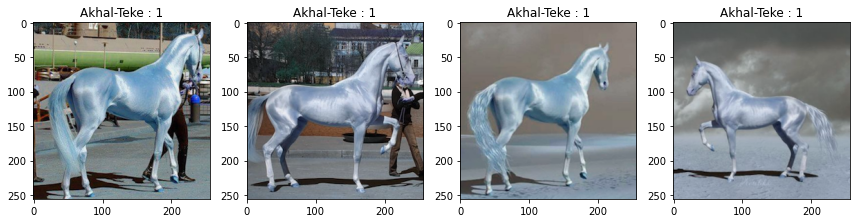

In [5]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\01_Akhal-Teke' + "/" + breed_01[i])
    plt.imshow(img)
    plt.title('Akhal-Teke : 1')
    plt.tight_layout()
plt.show()

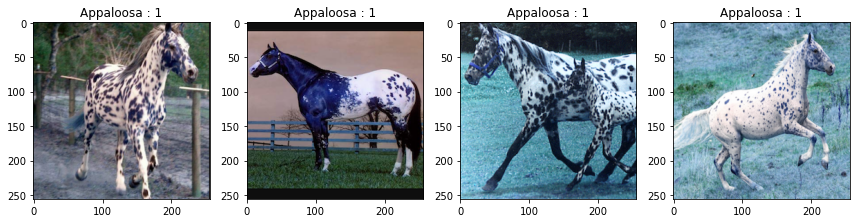

In [6]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\02_Appaloosa' + "/" + breed_02[i])
    plt.imshow(img)
    plt.title('Appaloosa : 1')
    plt.tight_layout()
plt.show()

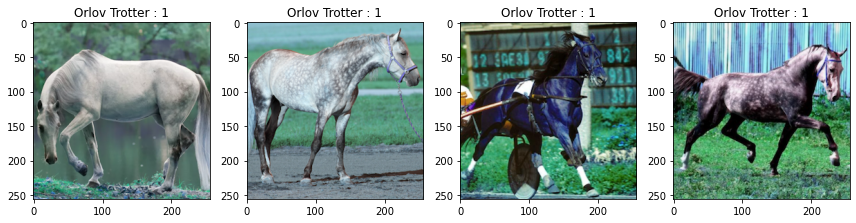

In [7]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\03_Orlov Trotter' + "/" + breed_03[i])
    plt.imshow(img)
    plt.title('Orlov Trotter : 1')
    plt.tight_layout()
plt.show()

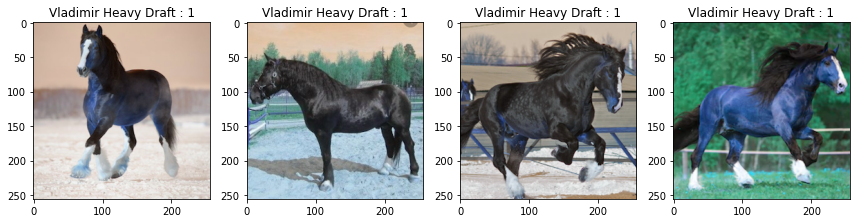

In [8]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\04_Vladimir Heavy Draft' + "/" + breed_04[i])
    plt.imshow(img)
    plt.title('Vladimir Heavy Draft : 1')
    plt.tight_layout()
plt.show()

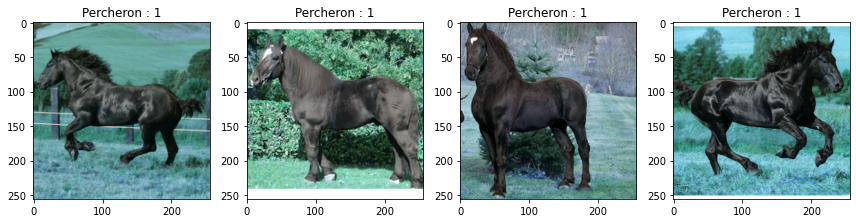

In [9]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\05_Percheron' + "/" + breed_05[i])
    plt.imshow(img)
    plt.title('Percheron : 1')
    plt.tight_layout()
plt.show()

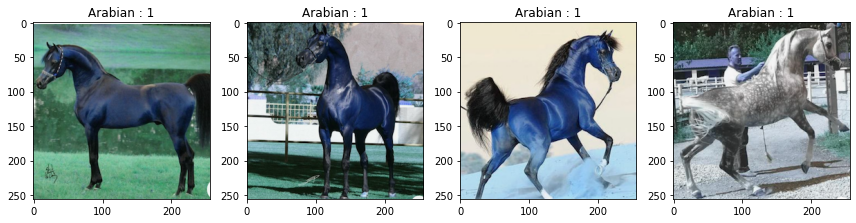

In [10]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\06_Arabian' + "/" + breed_06[i])
    plt.imshow(img)
    plt.title('Arabian : 1')
    plt.tight_layout()
plt.show()

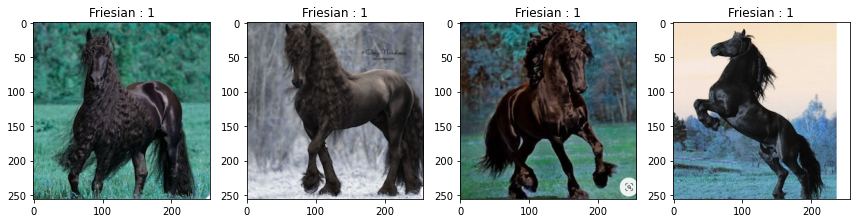

In [11]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\07_Friesian' + "/" + breed_07[i])
    plt.imshow(img)
    plt.title('Friesian : 1')
    plt.tight_layout()
plt.show()

In [12]:
img_rows, img_cols = 224,224### Creating the sample and labels

#### Creating the sample and labels

In [13]:
X = []
y = []
for img in breed_01:
    try:
        img_read = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\01_Akhal-Teke' + "/" + img)
        img_resize = cv2.resize(img_read,  (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(0)
    except:
        pass
    
        
for img in breed_02:
    try:
        img_read = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\02_Appaloosa' + "/" + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(1)
    except:
        pass

for img in breed_03:
    try:
        img_read = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\03_Orlov Trotter' + "/" + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(2)
    except:
        pass

for img in breed_04:
    try:
        img_read = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\04_Vladimir Heavy Draft' + "/" + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(3)
    except:
        pass
    
for img in breed_05:
    try:
        img_read = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\05_Percheron' + "/" + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(4)
    except:
        pass

for img in breed_06:
    try:
        img_read = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\06_Arabian' + "/" + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(5)
    except:
        pass
    
for img in breed_07:
    try:
        img_read = cv2.imread(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\Dataset\07_Friesian' + "/" + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        X.append(img_array)
        y.append(6)
    except:
        pass

#### Dividing the dataset in to train and test dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [16]:
type(X_train[0])

numpy.ndarray

In [17]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
print("Shape of Training Image data: ", X_train.shape)
print("Shape of Testing Image data: ", X_test.shape)
print("Shape of Training Label: ", y_train.shape)
print("Shape of Training Label: ", y_test.shape)

Shape of Training Image data:  (536, 224, 224, 3)
Shape of Testing Image data:  (134, 224, 224, 3)
Shape of Training Label:  (536,)
Shape of Training Label:  (134,)


In [20]:
y_train = np_utils.to_categorical(y_train, num_classes = 7)
y_test = np_utils.to_categorical(y_test, num_classes = 7)

In [21]:
X_train[0].shape

(224, 224, 3)

In [22]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
print(X_train[0], y_train[0])

[[[0.7921569  0.7372549  0.7137255 ]
  [0.7921569  0.7372549  0.7137255 ]
  [0.8        0.74509805 0.7176471 ]
  ...
  [0.6156863  0.6        0.62352943]
  [0.61960787 0.6039216  0.62352943]
  [0.60784316 0.5921569  0.6117647 ]]

 [[0.7882353  0.7411765  0.7137255 ]
  [0.7882353  0.7411765  0.7137255 ]
  [0.7921569  0.74509805 0.7176471 ]
  ...
  [0.6156863  0.6        0.62352943]
  [0.6156863  0.6        0.62352943]
  [0.60784316 0.5921569  0.6156863 ]]

 [[0.7882353  0.7411765  0.7137255 ]
  [0.7882353  0.7411765  0.7137255 ]
  [0.7921569  0.74509805 0.7176471 ]
  ...
  [0.6117647  0.59607846 0.61960787]
  [0.6117647  0.59607846 0.61960787]
  [0.6117647  0.59607846 0.61960787]]

 ...

 [[0.8666667  0.81960785 0.80784315]
  [0.87058824 0.8235294  0.8117647 ]
  [0.87058824 0.8235294  0.8117647 ]
  ...
  [0.81960785 0.78039217 0.76862746]
  [0.8039216  0.7647059  0.7529412 ]
  [0.77254903 0.7372549  0.7254902 ]]

 [[0.87058824 0.8235294  0.8117647 ]
  [0.8666667  0.81960785 0.80784315]


#### Model Building

In [24]:
### Model Building# MobileNet is designed to work with images of dim 224,224
mobilenet = MobileNet(weights='imagenet',include_top=False,input_shape=(img_rows,img_cols,3))

#### Model Summary

In [25]:
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [26]:
for layer in mobilenet.layers:
  layer.trainable = False 
# this means weights are not to be trained. keep the imagenet weights as it is


#### Adding 4 layers to the bottom of the mobilenet model

In [27]:
def addTopModelMobileNet(model1, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    model2 = model1.output
    model2 = GlobalAveragePooling2D()(model2)
    model2 = Dense(1024,activation='relu')(model2)
    
    model2 = Dense(1024,activation='relu')(model2)
    
    model2 = Dense(512,activation='relu')(model2)
    
    model2 = Dense(num_classes,activation='softmax')(model2)

    return model2

In [28]:
num_classes = 7 

mobilenet_model = addTopModelMobileNet(mobilenet, num_classes)

model = Model(inputs = mobilenet.input, outputs = mobilenet_model)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

#### Model Compilation

In [29]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])

#### Training the model

In [30]:
r = model.fit(X_train, y_train, batch_size = 32, epochs = 25, validation_data = (X_test, y_test) )

Epoch 1/25
17/17 [==============================] - 19s 1s/step - loss: 2.1361 - accuracy: 0.3276 - val_loss: 0.7571 - val_accuracy: 0.7612
Epoch 2/25
17/17 [==============================] - 15s 880ms/step - loss: 0.7546 - accuracy: 0.7109 - val_loss: 0.5251 - val_accuracy: 0.7910
Epoch 3/25
17/17 [==============================] - 14s 833ms/step - loss: 0.3671 - accuracy: 0.8685 - val_loss: 0.4072 - val_accuracy: 0.8731
Epoch 4/25
17/17 [==============================] - 14s 839ms/step - loss: 0.1261 - accuracy: 0.9635 - val_loss: 0.4239 - val_accuracy: 0.9104
Epoch 5/25
17/17 [==============================] - 14s 829ms/step - loss: 0.1035 - accuracy: 0.9682 - val_loss: 0.4374 - val_accuracy: 0.8955
Epoch 6/25
17/17 [==============================] - 14s 826ms/step - loss: 0.0579 - accuracy: 0.9861 - val_loss: 0.4444 - val_accuracy: 0.8955
Epoch 7/25
17/17 [==============================] - 14s 847ms/step - loss: 0.0234 - accuracy: 0.9970 - val_loss: 0.5729 - val_accuracy: 0.8731
Ep

#### Model Evaluation

In [31]:
model.evaluate(X_test, y_test)### Model Evaluation

5/5 [==============================] - 3s 515ms/step - loss: 0.5963 - accuracy: 0.9254


[0.5963314771652222, 0.9253731369972229]

#### plot the loss

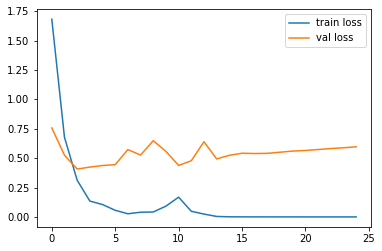

<Figure size 432x288 with 0 Axes>

In [32]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#### plot the accuracy

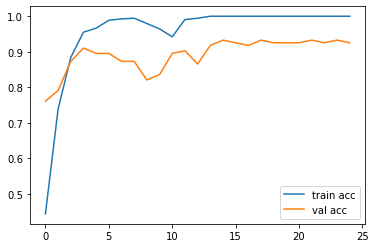

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([[1.78628792e-08, 3.93520213e-06, 6.37854318e-05, 9.93038476e-01,
        6.88435789e-03, 2.45015457e-08, 9.52448499e-06],
       [1.97206766e-08, 1.00000000e+00, 1.25951169e-08, 1.18379238e-13,
        1.69053022e-10, 2.90017142e-11, 3.37360999e-13],
       [1.12207746e-02, 9.81790799e-06, 1.06646316e-02, 2.28885983e-05,
        3.24163443e-06, 9.78078544e-01, 1.16442088e-07],
       [1.67862913e-12, 3.11964876e-09, 9.18878840e-08, 4.53426203e-08,
        8.35816900e-06, 4.79066960e-12, 9.99991536e-01],
       [1.83443788e-07, 1.19353596e-10, 9.99999762e-01, 3.70115077e-10,
        2.07615933e-08, 9.10635034e-09, 1.98021058e-10],
       [9.86320536e-09, 6.55827989e-07, 1.15110954e-04, 9.89258111e-01,
        1.06084235e-02, 2.47182186e-09, 1.77462480e-05],
       [9.99864817e-01, 1.13860203e-07, 1.30407934e-04, 1.65128779e-06,
        1.26544453e-09, 2.99101703e-06, 1.68975375e-10],
       [1.02713550e-18, 1.00000000e+00, 5.06541220e-17, 9.76188605e-20,
        4.01674137e-14, 2

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred

array([3, 1, 5, 6, 2, 3, 0, 1, 5, 0, 0, 2, 4, 1, 1, 0, 0, 6, 2, 1, 0, 6,
       3, 2, 6, 5, 2, 6, 3, 0, 2, 6, 5, 1, 1, 0, 0, 2, 0, 6, 6, 5, 0, 4,
       6, 6, 6, 0, 0, 2, 6, 3, 0, 6, 0, 6, 6, 4, 3, 1, 1, 0, 5, 1, 5, 6,
       6, 2, 0, 1, 0, 0, 2, 4, 0, 0, 3, 1, 5, 6, 5, 1, 5, 0, 6, 0, 1, 3,
       0, 5, 2, 5, 6, 6, 1, 5, 1, 2, 2, 6, 0, 5, 2, 5, 6, 5, 5, 0, 1, 0,
       5, 0, 2, 5, 2, 1, 1, 5, 5, 1, 2, 1, 5, 5, 0, 2, 0, 0, 6, 5, 4, 6,
       1, 0], dtype=int64)

#### save the model as a h5 file

In [38]:
from tensorflow.keras.models import load_model

model.save('model_CNN.h5')#### save the model as a h5 file

#### Check how your model is working.

It is a : Percheron


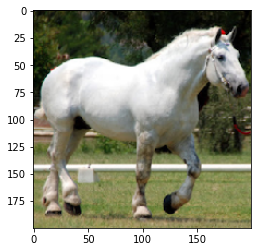

In [39]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np 
from skimage import io
import matplotlib.pyplot as plt

model = load_model(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\model_CNN.h5')
class_labels = ['Akhal-Teke', 
                'Appaloosa', 
                'Orlov Trotter', 
                'Vladimir Heavy Draft', 
                'Percheron', 
                'Arabian',
                'Friesian' ]

img = image.load_img(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\detect.png', color_mode = "rgb", target_size=(224, 224))
show_img=image.load_img(r'E:\Desktop_C\practice\Deep Learning\to do\Unique\Horse Breed\detect.png', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

pred = model.predict(x)[0]
label = class_labels[pred.argmax()]

plt.imshow(show_img)
print('It is a :',label)


In [ ]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

tfmodel = converter.convert()

open('Horse_Breeds_Classification.tflite', 'wb').write(tfmodel)